# Isolation Forest
This notebook will introduce the Isolation Forest and the results obtained

In [1]:
import helpers

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import IsolationForest

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import random
from itertools import combinations

from pylab import rcParams
rcParams['figure.figsize'] = 12, 7

## Train model

In [2]:
X_train, X_test, scaler= helpers.get_healthy_matrixes()
X_other,_,_= helpers.get_other_matrixes(scaler)

['1_10_05A.csv', '1_10_1A.csv', '1_10_2A.csv', '1_10_3A.csv', '1_1_05A.csv', '1_1_1A.csv', '1_1_2A.csv', '1_1_3A.csv', '1_2_05A.csv', '1_2_1A.csv', '1_2_2A.csv', '1_2_3A.csv', '1_3_05A.csv', '1_3_1A.csv', '1_3_2A.csv', '1_3_3A.csv', '1_4_05A.csv', '1_4_1A.csv', '1_4_2A.csv', '1_4_3A.csv', '1_5_05A.csv', '1_5_1A.csv', '1_5_2A.csv', '1_5_3A.csv', '1_6_05A.csv', '1_6_1A.csv', '1_6_2A.csv', '1_6_3A.csv', '1_7_05A.csv', '1_7_1A.csv', '1_7_2A.csv', '1_7_3A.csv', '1_8_05A.csv', '1_8_1A.csv', '1_8_2A.csv', '1_8_3A.csv', '1_9_05A.csv', '1_9_1A.csv', '1_9_2A.csv', '1_9_3A.csv']
Getting data from file 1_10_05A.csv with shape (16517, 24)
Getting data from file 1_10_1A.csv with shape (16517, 24)
Getting data from file 1_10_2A.csv with shape (16517, 24)
Getting data from file 1_10_3A.csv with shape (16517, 24)
Getting data from file 1_1_05A.csv with shape (16517, 24)
Getting data from file 1_1_1A.csv with shape (16517, 24)
Getting data from file 1_1_2A.csv with shape (16517, 24)
Getting data from fi

In [3]:
train=helpers.get_features(X_train)
test=helpers.get_features(X_test)
other=helpers.get_features(X_other)

/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: divide by zero encountered in log
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))
/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: invalid value encountered in multiply
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))


In [4]:
df_train=pd.DataFrame(train,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])
df_test=pd.DataFrame(test,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])
df_other=pd.DataFrame(other,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])

In [5]:
dict_for_test={"train":df_train,"test":df_test,"other":df_other}
dict_test_expected={"train":1,"test":1,"other":-1}

In [6]:
# choose random outliers but store them for repeatable results
random_outliers = {}
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        random_outliers[params] = random.sample(dict_for_test["other"][list(params)].values.tolist(),232)

In [7]:
estimators_l, acc_l, params_l = [], [], []
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        for estimators in [5,10, 50, 100]:
                results, cm, acc = helpers.train_predict_Isolation_noshow(df_train, dict_for_test, dict_test_expected,list(params), random_outliers[params], estimators)
                estimators_l.append(estimators)
                acc_l.append(acc)
                params_l.append(params)
res_rbf = pd.DataFrame({"params": params_l, "estimators": estimators_l, "accuracy": acc_l})

Isolation forest ['mean', 'std'], n_estimators = 5
Isolation forest ['mean', 'std'], n_estimators = 10
Isolation forest ['mean', 'std'], n_estimators = 50
Isolation forest ['mean', 'std'], n_estimators = 100
Isolation forest ['mean', 'kurt'], n_estimators = 5
Isolation forest ['mean', 'kurt'], n_estimators = 10
Isolation forest ['mean', 'kurt'], n_estimators = 50
Isolation forest ['mean', 'kurt'], n_estimators = 100
Isolation forest ['mean', 'rms'], n_estimators = 5
Isolation forest ['mean', 'rms'], n_estimators = 10
Isolation forest ['mean', 'rms'], n_estimators = 50
Isolation forest ['mean', 'rms'], n_estimators = 100
Isolation forest ['mean', 'pp'], n_estimators = 5
Isolation forest ['mean', 'pp'], n_estimators = 10
Isolation forest ['mean', 'pp'], n_estimators = 50
Isolation forest ['mean', 'pp'], n_estimators = 100
Isolation forest ['mean', 'zp'], n_estimators = 5
Isolation forest ['mean', 'zp'], n_estimators = 10
Isolation forest ['mean', 'zp'], n_estimators = 50
Isolation forest

Isolation forest ['mean', 'kurt', 'ent'], n_estimators = 100
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 5
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 10
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 50
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 100
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 5
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 10
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 50
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 100
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 5
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 10
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 50
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 100
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 5
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 10
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 50
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 100
Isolati

Isolation forest ['rms', 'pp', 'zp'], n_estimators = 50
Isolation forest ['rms', 'pp', 'zp'], n_estimators = 100
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 5
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 10
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 50
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 100
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 5
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 10
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 50
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 100
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 5
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 10
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 50
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 100
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 5
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 10
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 50
Isolation forest ['rms', 'zp', 'ent'], n_

In [8]:
res_rbf = pd.DataFrame({"params": params_l, "estimators": estimators_l, "accuracy": acc_l})

In [9]:
res_rbf.describe()

,estimators,accuracy
count,336.000000,336.000000
mean,41.250000,0.931172
std,38.197249,0.062966
min,5.000000,0.701205
25%,8.750000,0.877523
50%,30.000000,0.947967
75%,62.500000,0.987274
max,100.000000,1.000000


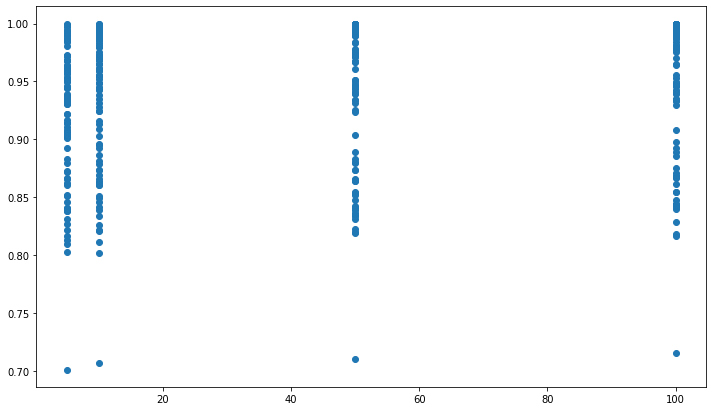

In [10]:
plt.scatter(res_rbf["estimators"],res_rbf["accuracy"])

In [11]:
res_rbf.sort_values(by="accuracy", ascending=False)[0:30]

,params,estimators,accuracy
214,"(std, kurt, ent)",50,1.000000
315,"(rms, zp, ent)",100,1.000000
251,"(std, zp, ent)",100,1.000000
243,"(std, pp, ent)",100,1.000000
170,"(mean, rms, ent)",50,1.000000
155,"(mean, kurt, ent)",100,1.000000
70,"(kurt, ent)",50,1.000000
71,"(kurt, ent)",100,1.000000
215,"(std, kurt, ent)",100,1.000000
154,"(mean, kurt, ent)",50,1.000000


In [12]:
results, cm, acc = helpers.train_predict_Isolation_noshow(df_train, dict_for_test, dict_test_expected,["kurt","ent"],random_outliers[("kurt","ent")], 100)

Isolation forest ['kurt', 'ent'], n_estimators = 100


In [13]:
cm

array([[3320,    0],
       [   0, 3320]])

In [14]:
results

{'train': (array([1]), array([2656])),
 'test': (array([1]), array([664])),
 'other': (array([-1]), array([3320]))}

In [15]:
acc

1.0

In [16]:
results

{'train': (array([1]), array([2656])),
 'test': (array([1]), array([664])),
 'other': (array([-1]), array([3320]))}

Isolation forest ['kurt', 'ent'], n_estimators = 100


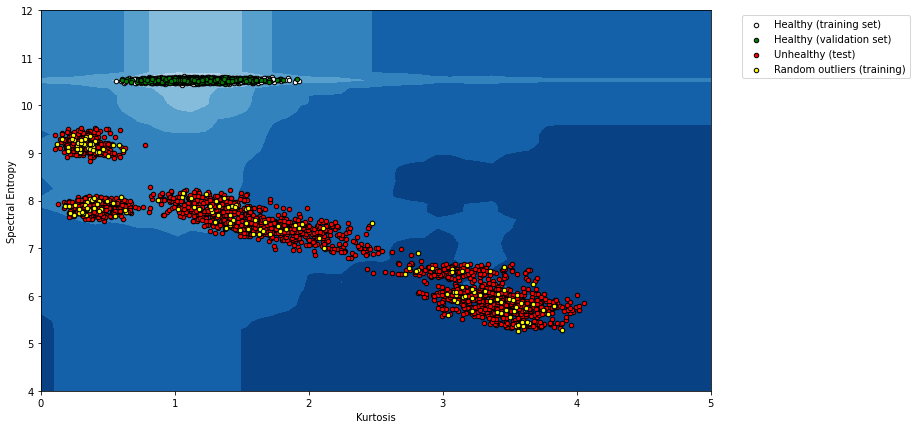

In [17]:
params=["kurt","ent"]
n_estimators=100
print(f"Isolation forest {params}, n_estimators = {n_estimators}")
train_data=helpers.append_data_from_nparray([df_train[params],random_outliers[("kurt", "ent")]])
clf = IsolationForest(random_state=34,n_estimators=n_estimators,contamination=len(random_outliers[("kurt", "ent")])/len(train_data)).fit(train_data)
y_true=[]
y_pred=[]
results={}
for dataset in dict_for_test:
    res=clf.predict(dict_for_test[dataset][params])
    results[dataset]=np.unique(res,return_counts=True)
    y_true.extend([dict_test_expected[dataset]]*len(res))
    y_pred.extend(res)
    cm=confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    accuracy=accuracy_score(y_true, y_pred)
    
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(0, 5, 50), np.linspace(4, 12, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(dict_for_test["train"][["kurt"]], dict_for_test["train"][["ent"]], c="white", s=20, edgecolor="k")
b2 = plt.scatter(dict_for_test["test"][["kurt"]], dict_for_test["test"][["ent"]], c="green", s=20, edgecolor="k")
c = plt.scatter(dict_for_test["other"][["kurt"]], dict_for_test["other"][["ent"]], c="red", s=20, edgecolor="k")
d = plt.scatter([item[0] for item in random_outliers[("kurt","ent")]], [item[1] for item in random_outliers[("kurt","ent")]], c="yellow", s=20, edgecolor="k")

plt.axis("tight")
plt.xlabel("Kurtosis")
plt.ylabel("Spectral Entropy")
plt.xlim((0, 5))
plt.ylim((4, 12))
plt.legend(
    [b1, b2, c, d],
    ["Healthy (training set)", "Healthy (validation set)", "Unhealthy (test)","Random outliers (training)"],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
)
plt.show()

In [18]:
res=clf.predict(train_data)
np.unique(res, return_counts=True)

(array([-1,  1]), array([ 232, 2656]))

In [19]:
X_replica ,_,_=helpers.get_replica_matrixes(scaler)
replica=helpers.get_features(X_replica)
df_replica=pd.DataFrame(replica,columns=["mean","std","kurt","rms","pp","zp","cf","ent"])

['2_1_1A.csv', '2_2_1A.csv', '2_3_1A.csv', '2_4_1A.csv', '2_5_1A.csv']
Getting data from file 2_1_1A.csv with shape (16517, 24)
Getting data from file 2_2_1A.csv with shape (16517, 24)
Getting data from file 2_3_1A.csv with shape (16517, 24)
Getting data from file 2_4_1A.csv with shape (16517, 24)
Getting data from file 2_5_1A.csv with shape (16517, 24)
Reshaping []data with shape (24, 82585) to (415, 4776), with k=199, len(data[0])/k=82585/199=415.0 samples
['2_1_2A.csv', '2_2_2A.csv', '2_3_2A.csv', '2_4_2A.csv', '2_5_2A.csv']
Getting data from file 2_1_2A.csv with shape (16517, 24)
Getting data from file 2_2_2A.csv with shape (16517, 24)
Getting data from file 2_3_2A.csv with shape (16517, 24)
Getting data from file 2_4_2A.csv with shape (16517, 24)
Getting data from file 2_5_2A.csv with shape (16517, 24)
Reshaping []data with shape (24, 82585) to (415, 4776), with k=199, len(data[0])/k=82585/199=415.0 samples
['2_1_3A.csv', '2_2_3A.csv', '2_3_3A.csv', '2_4_3A.csv', '2_5_3A.csv']
Get

/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: divide by zero encountered in log
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))
/home/clara/TFG/final_notebooks/helpers.py:194: RuntimeWarning: invalid value encountered in multiply
  return np.where(x == 0, 0, x * np.log(x) / np.log(base))


In [20]:
dict_for_test={"train":df_train,"test":df_replica,"other":df_other}
dict_test_expected={"train":1,"test":1,"other":1}
results, cm, acc = helpers.train_predict_Isolation_noshow(df_train,dict_for_test, dict_test_expected,["kurt","ent"], random_outliers[("kurt","ent")],100)

Isolation forest ['kurt', 'ent'], n_estimators = 100


In [21]:
cm

array([[3049]])

In [22]:
acc

0.39929282346778416

In [23]:
results

{'train': (array([1]), array([2656])),
 'test': (array([-1,  1]), array([1252,  408])),
 'other': (array([-1]), array([3320]))}

Isolation forest ['kurt', 'ent'], n_estimators = 100


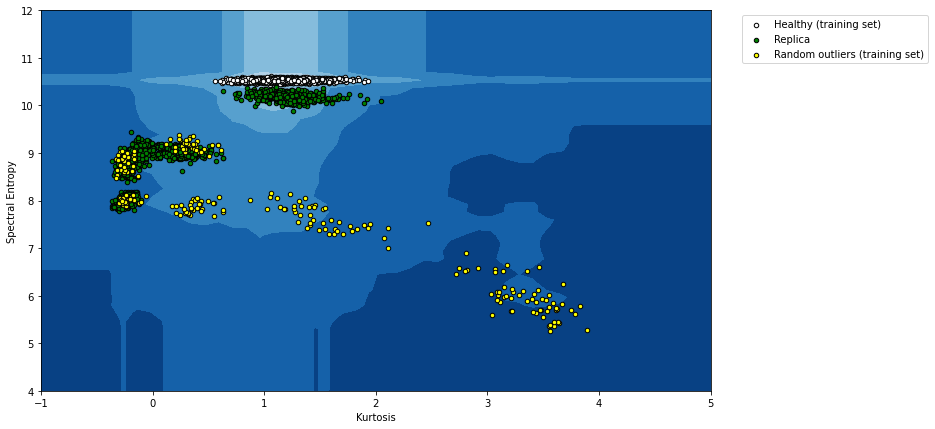

In [23]:
params=["kurt","ent"]
n_estimators=100
print(f"Isolation forest {params}, n_estimators = {n_estimators}")
train_data=helpers.append_data_from_nparray([df_train[params],random_outliers[("kurt", "ent")]])
clf = IsolationForest(random_state=34,n_estimators=n_estimators,contamination=len(random_outliers[("kurt", "ent")])/len(train_data)).fit(train_data)
y_true=[]
y_pred=[]
results={}
for dataset in dict_for_test:
    res=clf.predict(dict_for_test[dataset][params])
    results[dataset]=np.unique(res,return_counts=True)
    y_true.extend([dict_test_expected[dataset]]*len(res))
    y_pred.extend(res)
    cm=confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    accuracy=accuracy_score(y_true, y_pred)
    
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-1, 5, 50), np.linspace(4, 12, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(dict_for_test["train"][["kurt"]], dict_for_test["train"][["ent"]], c="white", s=20, edgecolor="k")
b2 = plt.scatter(dict_for_test["test"][["kurt"]], dict_for_test["test"][["ent"]], c="green", s=20, edgecolor="k")
d = plt.scatter([item[0] for item in random_outliers[("kurt","ent")]], [item[1] for item in random_outliers[("kurt","ent")]], c="yellow", s=20, edgecolor="k")

plt.axis("tight")
plt.xlabel("Kurtosis")
plt.ylabel("Spectral Entropy")
plt.xlim((-1, 5))
plt.ylim((4, 12))
plt.legend(
    [b1, b2, d],
    ["Healthy (training set)", "Replica","Random outliers (training set)"],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
)
plt.show()

In [24]:
df_replica_train, df_replica_test=helpers.train_test_split(df_replica, test_size=0.2)
dict_for_test={"train":df_replica_train,"test":df_replica_test,"other":df_other}
dict_test_expected={"train":1,"test":1,"other":-1}

In [25]:
# choose random outliers but store them for repeatable results
random_outliers = {}
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        random_outliers[params] = random.sample(dict_for_test["other"][list(params)].values.tolist(),166)

In [26]:
results, cm, acc = helpers.train_predict_Isolation_noshow(df_replica_train,dict_for_test, dict_test_expected,["kurt","ent"], random_outliers[("kurt", "ent")],100)

Isolation forest ['kurt', 'ent'], n_estimators = 100


In [27]:
results

{'train': (array([-1,  1]), array([  59, 1269])),
 'test': (array([-1,  1]), array([ 12, 320])),
 'other': (array([-1,  1]), array([2133, 1187]))}

In [28]:
cm

array([[2133, 1187],
       [  71, 1589]])

In [29]:
acc

0.7473895582329317

Isolation forest ['kurt', 'ent'], n_estimators = 100


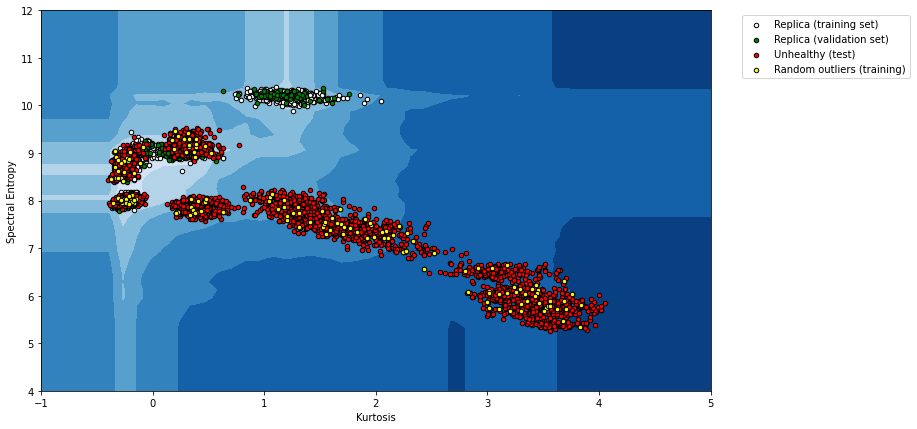

In [30]:
params=["kurt","ent"]
n_estimators=100
print(f"Isolation forest {params}, n_estimators = {n_estimators}")
train_data=helpers.append_data_from_nparray([df_replica_train[params],random_outliers[("kurt", "ent")]])
clf = IsolationForest(random_state=34,n_estimators=n_estimators,contamination=len(random_outliers[("kurt", "ent")])/len(train_data)).fit(train_data)
y_true=[]
y_pred=[]
results={}
for dataset in dict_for_test:
    res=clf.predict(dict_for_test[dataset][params])
    results[dataset]=np.unique(res,return_counts=True)
    y_true.extend([dict_test_expected[dataset]]*len(res))
    y_pred.extend(res)
    cm=confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    accuracy=accuracy_score(y_true, y_pred)
    
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-1, 5, 50), np.linspace(4, 12, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(dict_for_test["train"][["kurt"]], dict_for_test["train"][["ent"]], c="white", s=20, edgecolor="k")
b2 = plt.scatter(dict_for_test["test"][["kurt"]], dict_for_test["test"][["ent"]], c="green", s=20, edgecolor="k")
c = plt.scatter(dict_for_test["other"][["kurt"]], dict_for_test["other"][["ent"]], c="red", s=20, edgecolor="k")
d = plt.scatter([item[0] for item in random_outliers[("kurt","ent")]], [item[1] for item in random_outliers[("kurt","ent")]], c="yellow", s=20, edgecolor="k")

plt.axis("tight")
plt.xlabel("Kurtosis")
plt.ylabel("Spectral Entropy")
plt.xlim((-1, 5))
plt.ylim((4, 12))
plt.legend(
    [b1, b2, c, d],
    ["Replica (training set)", "Replica (validation set)", "Unhealthy (test)","Random outliers (training)"],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
)
plt.show()

In [31]:
estimators_l, acc_l, params_l = [], [], []
for i in range(2,4):
    for params in combinations(["mean","std","kurt","rms","pp","zp","cf","ent"], i):
        for estimators in [5,10, 50, 100]:
                results, cm, acc = helpers.train_predict_Isolation_noshow(df_replica_train, dict_for_test, dict_test_expected,list(params), random_outliers[params], estimators)
                estimators_l.append(estimators)
                acc_l.append(acc)
                params_l.append(params)
res_rbf = pd.DataFrame({"params": params_l, "estimators": estimators_l, "accuracy": acc_l})

Isolation forest ['mean', 'std'], n_estimators = 5
Isolation forest ['mean', 'std'], n_estimators = 10
Isolation forest ['mean', 'std'], n_estimators = 50
Isolation forest ['mean', 'std'], n_estimators = 100
Isolation forest ['mean', 'kurt'], n_estimators = 5
Isolation forest ['mean', 'kurt'], n_estimators = 10
Isolation forest ['mean', 'kurt'], n_estimators = 50
Isolation forest ['mean', 'kurt'], n_estimators = 100
Isolation forest ['mean', 'rms'], n_estimators = 5
Isolation forest ['mean', 'rms'], n_estimators = 10
Isolation forest ['mean', 'rms'], n_estimators = 50
Isolation forest ['mean', 'rms'], n_estimators = 100
Isolation forest ['mean', 'pp'], n_estimators = 5
Isolation forest ['mean', 'pp'], n_estimators = 10
Isolation forest ['mean', 'pp'], n_estimators = 50
Isolation forest ['mean', 'pp'], n_estimators = 100
Isolation forest ['mean', 'zp'], n_estimators = 5
Isolation forest ['mean', 'zp'], n_estimators = 10
Isolation forest ['mean', 'zp'], n_estimators = 50
Isolation forest

Isolation forest ['mean', 'kurt', 'ent'], n_estimators = 100
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 5
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 10
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 50
Isolation forest ['mean', 'rms', 'pp'], n_estimators = 100
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 5
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 10
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 50
Isolation forest ['mean', 'rms', 'zp'], n_estimators = 100
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 5
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 10
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 50
Isolation forest ['mean', 'rms', 'cf'], n_estimators = 100
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 5
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 10
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 50
Isolation forest ['mean', 'rms', 'ent'], n_estimators = 100
Isolati

Isolation forest ['rms', 'pp', 'zp'], n_estimators = 100
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 5
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 10
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 50
Isolation forest ['rms', 'pp', 'cf'], n_estimators = 100
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 5
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 10
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 50
Isolation forest ['rms', 'pp', 'ent'], n_estimators = 100
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 5
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 10
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 50
Isolation forest ['rms', 'zp', 'cf'], n_estimators = 100
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 5
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 10
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 50
Isolation forest ['rms', 'zp', 'ent'], n_estimators = 100
Isolation forest ['rms', 'cf', 'ent'], 

In [32]:
res_rbf = pd.DataFrame({"params": params_l, "estimators": estimators_l, "accuracy": acc_l})

In [33]:
res_rbf.describe()

,estimators,accuracy
count,336.000000,336.000000
mean,41.250000,0.742808
std,38.197249,0.120450
min,5.000000,0.369277
25%,8.750000,0.671536
50%,30.000000,0.750502
75%,62.500000,0.842319
max,100.000000,0.938755


In [34]:
res_rbf.sort_values(by="accuracy", ascending=False)

,params,estimators,accuracy
114,"(mean, std, kurt)",50,0.938755
113,"(mean, std, kurt)",10,0.937550
2,"(mean, std)",50,0.935743
3,"(mean, std)",100,0.935341
7,"(mean, kurt)",100,0.929518
...,...,...,...
92,"(pp, cf)",5,0.455020
103,"(zp, cf)",100,0.454819
94,"(pp, cf)",50,0.452811
100,"(zp, cf)",5,0.447189


In [35]:
results, cm, acc = helpers.train_predict_Isolation_noshow(df_replica_train,dict_for_test, dict_test_expected,["mean","std"], random_outliers[("mean", "std")],50)

Isolation forest ['mean', 'std'], n_estimators = 50


In [36]:
acc

0.9357429718875502

In [37]:
results

{'train': (array([-1,  1]), array([  14, 1314])),
 'test': (array([-1,  1]), array([  5, 327])),
 'other': (array([-1,  1]), array([3019,  301]))}

Isolation forest ['mean', 'std'], n_estimators = 100


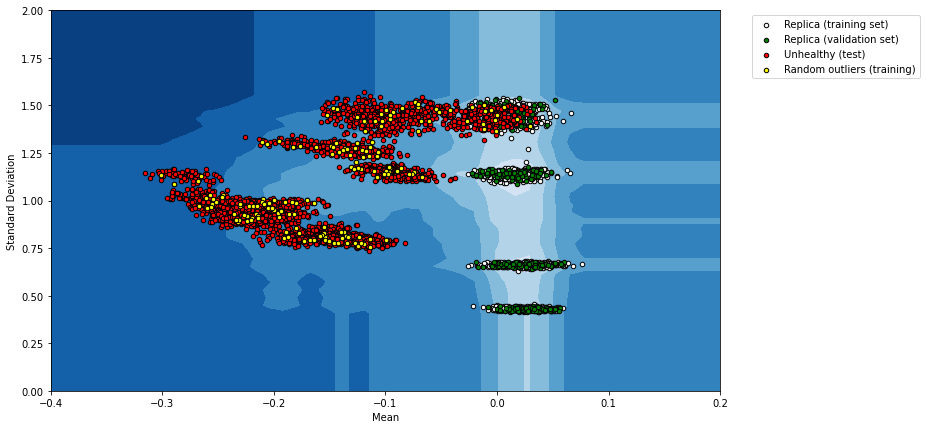

In [39]:
params=["mean","std"]
n_estimators=100
print(f"Isolation forest {params}, n_estimators = {n_estimators}")
train_data=helpers.append_data_from_nparray([df_replica_train[params],random_outliers[("mean", "std")]])
clf = IsolationForest(random_state=34,n_estimators=n_estimators,contamination=len(random_outliers[("mean", "std")])/len(train_data)).fit(train_data)
y_true=[]
y_pred=[]
results={}
for dataset in dict_for_test:
    res=clf.predict(dict_for_test[dataset][params])
    results[dataset]=np.unique(res,return_counts=True)
    y_true.extend([dict_test_expected[dataset]]*len(res))
    y_pred.extend(res)
    cm=confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    accuracy=accuracy_score(y_true, y_pred)
    
# plot the line, the samples, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-0.4, 0.2, 50), np.linspace(0, 2, 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap=plt.cm.Blues_r)

b1 = plt.scatter(dict_for_test["train"][["mean"]], dict_for_test["train"][["std"]], c="white", s=20, edgecolor="k")
b2 = plt.scatter(dict_for_test["test"][["mean"]], dict_for_test["test"][["std"]], c="green", s=20, edgecolor="k")
c = plt.scatter(dict_for_test["other"][["mean"]], dict_for_test["other"][["std"]], c="red", s=20, edgecolor="k")
d = plt.scatter([item[0] for item in random_outliers[("mean","std")]], [item[1] for item in random_outliers[("mean","std")]], c="yellow", s=20, edgecolor="k")

plt.axis("tight")
plt.xlabel("Mean")
plt.ylabel("Standard Deviation")
plt.xlim((-0.4, 0.2))
plt.ylim((0, 2))
plt.legend(
    [b1, b2, c, d],
    ["Replica (training set)", "Replica (validation set)", "Unhealthy (test)","Random outliers (training)"],
    bbox_to_anchor=(1.04,1),
    loc="upper left",
)
plt.show()